## 逻辑回归

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
%matplotlib inline

In [2]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 提取特征和标签

In [3]:
X=iris.data[:,:] # 前4列为4个特征，分别为花萼长度、花萼宽度、花瓣长度、花瓣宽度。
y=pd.Categorical(iris.target).codes # pd.Categorical(iris.target) 可以将 iris.target 转化为 Pandas 中的 Categorical 类型，表示一组有限的离散取值。而 .codes 则可以将 Categorical 类型转化为整数编码。这个操作同样适用于其他模型标签值当中。
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

### 查看不同类在相同特征上的关联

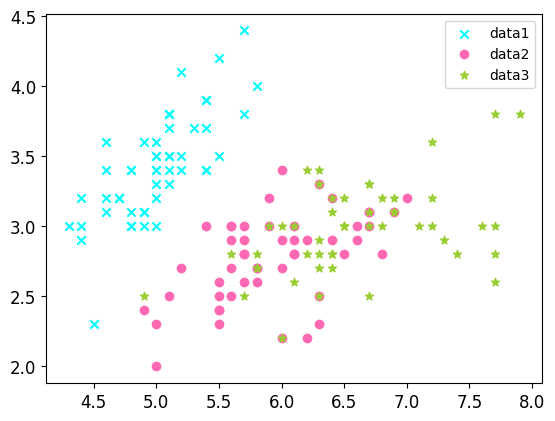

In [4]:
plt.scatter(X[y==0,0],X[y==0,1],marker='x',c='cyan',label='data1')
plt.scatter(X[y==1,0],X[y==1,1],marker='o',c='hotpink',label='data2')
plt.scatter(X[y==2,0],X[y==2,1],marker='*',c='yellowgreen',label='data3')
plt.legend(loc='best')
plt.show()

In [9]:
X[y==0,0],X[y==0,1]

(array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ]),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
        3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
        3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3]))

### 划分训练集和测试集

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 创建模型

In [6]:
classify_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs')
"""
multi_class 是 LogisticRegression 类的一个参数，用于指定多分类问题的处理方法。它有以下取值：
'ovr'：使用一对多方法进行多分类（默认值）。
'multinomial'：使用多项式逻辑回归方法进行多分类。
"""
classify_reg.fit(X_train,y_train)

d:\software\developtools\anaconda3\envs\deeplearning_env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

### 计算精确度

In [7]:
y_pred=classify_reg.predict(X_test)
accuracy=np.sum((y_pred==y_test))/y_test.shape[0]
print(f'accuracy:{accuracy:.4%}')

accuracy:100.0000%


### 绘图

ValueError: Expected 2D array, got 1D array instead:
array=[4. 5. 6. 7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

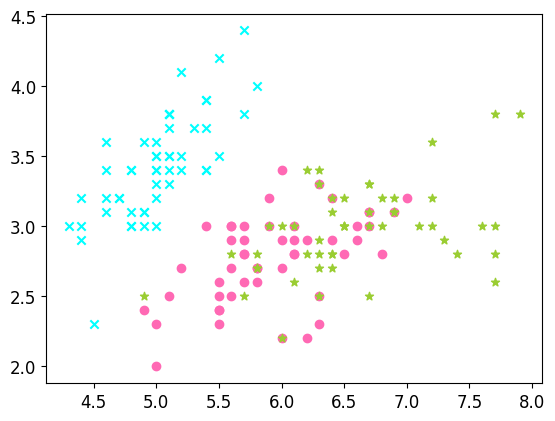

In [11]:
plt.scatter(X[y==0,0],X[y==0,1],marker='x',c='cyan',label='data1')
plt.scatter(X[y==1,0],X[y==1,1],marker='o',c='hotpink',label='data2')
plt.scatter(X[y==2,0],X[y==2,1],marker='*',c='yellowgreen',label='data3')
x=np.arange(4.0,8.0)
y_pred=classify_reg.predict(x)
plt.plot(x,y_pred,linestyle='dashed',label='diff')
plt.legend(loc='best')
plt.show()

In [25]:
# 画出数据点和边界
def border_of_classifier(sklearn_cl, x, y):
        """
        param sklearn_cl : skearn 的分类器
        param x: np.array 
        param y: np.array
        """
        ## 1 生成网格数据
        x_min, y_min = x.min(axis = 0) - 1,y.min()-1
        x_max, y_max = x.max(axis = 0) + 1,y.max()+1
        # 利用一组网格数据求出方程的值，然后把边界画出来。
        x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.01).any(),np.arange(y_min, y_max, 0.01))
        # 计算出分类器对所有数据点的分类结果 生成网格采样
        mesh_output = sklearn_cl.predict(np.c_[x_values.ravel(), y_values.ravel()])
        # 数组维度变形  
        mesh_output = mesh_output.reshape(x_values.shape)
        fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
        ## 会根据 mesh_output结果自动从 cmap 中选择颜色
        plt.pcolormesh(x_values, y_values, mesh_output, cmap = 'rainbow')
        plt.scatter(x[:, 0], x[:, 1], c = y, s=100, edgecolors ='steelblue' , linewidth = 1, cmap = plt.cm.Spectral)
        plt.xlim(x_values.min(), x_values.max())
        plt.ylim(y_values.min(), y_values.max())
        # 设置x轴和y轴
        plt.xticks((np.arange(np.ceil(min(x[:, 0]) - 1), np.ceil(max(x[:, 0]) + 1), 1.0)))
        plt.yticks((np.arange(np.ceil(min(x[:, 1]) - 1), np.ceil(max(x[:, 1]) + 1), 1.0)))
        plt.show()

In [26]:
border_of_classifier(classify_reg,X,y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)